# Análisis de Datos: Costos de Seguros Médicos

### Dataset: Medical Insurance Cost Dataset


### 1. Importación de Librerías

In [1]:
## 1. Importación de Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


#  Configuración de visualización
plt.style.use('seaborn-darkgrid') 
sns.set_palette("husl")
%matplotlib inline


### 2. Carga  de Datos y exploracion inicial del Dataset

In [2]:
## 2. Carga  de Datos

df = pd.read_csv('C:/Users/edher/Downloads/insurance.csv')


In [3]:
# EXPLORACIÓN INICIAL DEL DATASET

# Información general
# Filas df.shape[0]

#Columnas df.shape[1]

# Forma del dataset
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")


# Primeras 5 filas:
print(df.head())

# Información de tipos de datos:
print(df.info())

# Estadísticas descriptivas
print(df.describe())

Dimensiones: 1338 filas x 7 columnas
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       cha

### 3. Análisis del Conjunto de Datos

TRANSFORMACIONES REALIZADAS:

1. No se requieren transformaciones de separación de columnas (todas las columnas 
   ya están en formato apropiado).
   
2. Verificación de tipos de datos: Todas las variables están correctamente tipadas
   - Variables categóricas: sex, smoker, region (object)
   - Variables numéricas: age, bmi, children, charges (numeric)
   
3. No se requiere normalización de nombres (ya están en formato consistente).

IMPORTANTE: Este es un problema de REGRESIÓN, no clasificación, ya que la variable
objetivo 'charges' es continua (costo del seguro en dólares).

In [5]:
## 3. Análisis del Conjunto de Datos

print("ANÁLISIS DETALLADO DEL DATASET")


# Verificar valores nulos
print("\n Valores Nulos por Columna:")
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_df = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje': null_percentage
})
print(null_df)

if null_df['Valores Nulos'].sum() == 0:
    print("\n No se encontraron valores nulos en el dataset")

# Verificar duplicados
print(f"\n Registros duplicados: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print(f"Porcentaje de duplicados: {(df.duplicated().sum() / len(df)) * 100:.2f}%")

# Análisis de variables categóricas
print("\n Variables Categóricas:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Proporción:")
    print(df[col].value_counts(normalize=True).round(3))

# Análisis de variables numéricas
print("\n Variables Numéricas:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Media: {df[col].mean():.2f}")
    print(f"  Mediana: {df[col].median():.2f}")
    print(f"  Desv. Estándar: {df[col].std():.2f}")


   

ANÁLISIS DETALLADO DEL DATASET

 Valores Nulos por Columna:
          Valores Nulos  Porcentaje
age                   0         0.0
sex                   0         0.0
bmi                   0         0.0
children              0         0.0
smoker                0         0.0
region                0         0.0
charges               0         0.0

 No se encontraron valores nulos en el dataset

 Registros duplicados: 1
Porcentaje de duplicados: 0.07%

 Variables Categóricas:

sex:
male      676
female    662
Name: sex, dtype: int64
Proporción:
male      0.505
female    0.495
Name: sex, dtype: float64

smoker:
no     1064
yes     274
Name: smoker, dtype: int64
Proporción:
no     0.795
yes    0.205
Name: smoker, dtype: float64

region:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
Proporción:
southeast    0.272
southwest    0.243
northwest    0.243
northeast    0.242
Name: region, dtype: float64

 Variables Numéricas:

age:
  Min: 18.00
  M

In [6]:
# Crear copia del dataset
df_clean = df.copy()

print(f"\n Dataset preparado - shape: {df_clean.shape}")
print("\nPrimeras filas del dataset:")
print(df_clean.head())



 Dataset preparado - shape: (1338, 7)

Primeras filas del dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### 5. Análisis Univariante


ANÁLISIS UNIVARIANTE


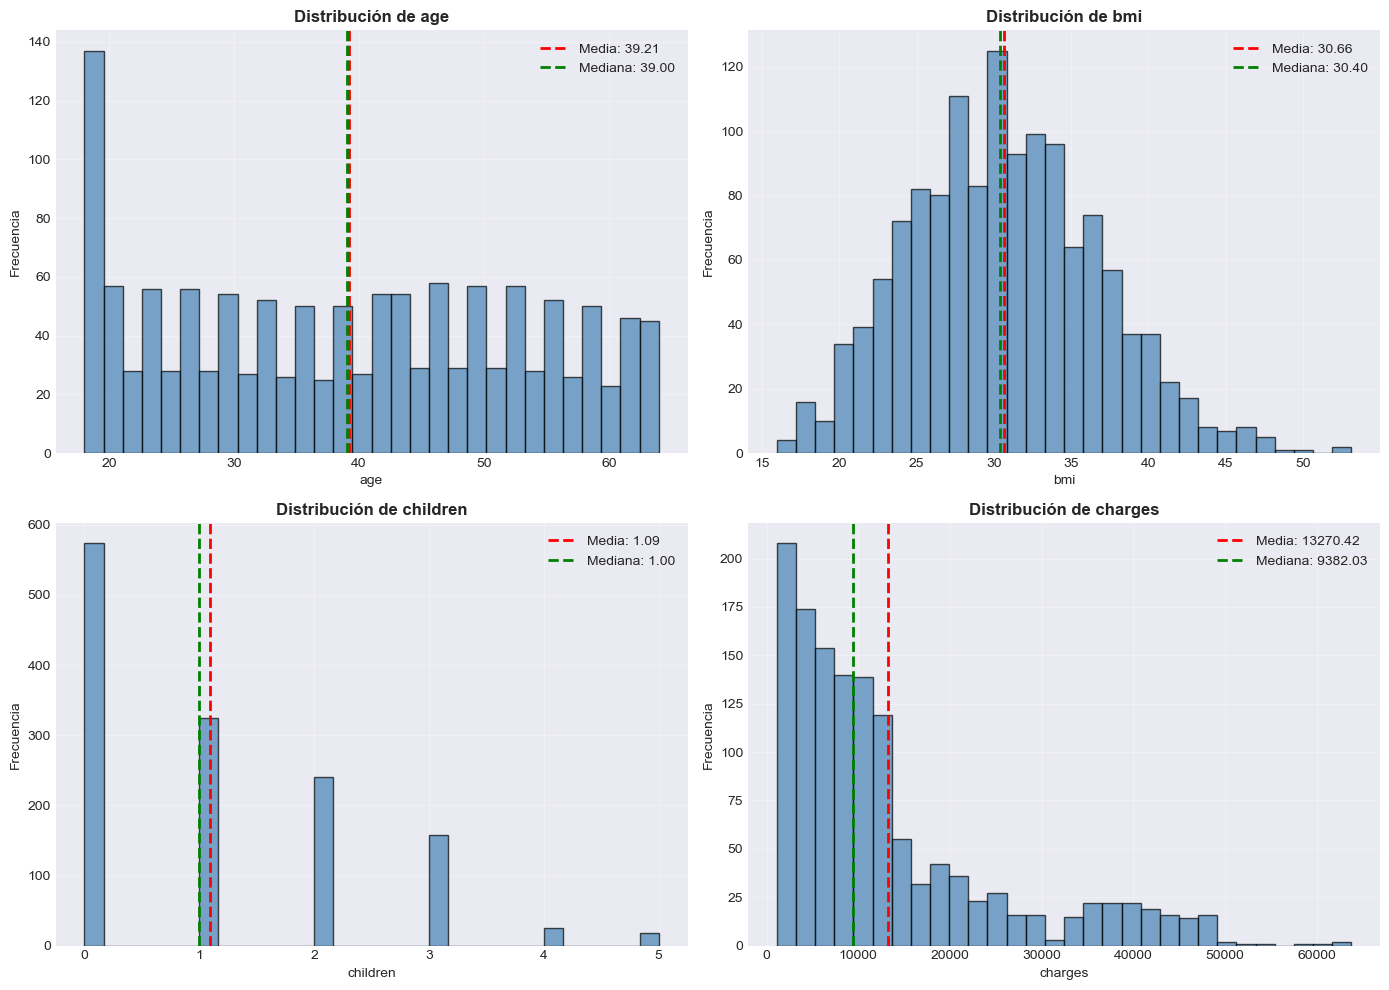


 DEDUCCIONES DEL ANÁLISIS UNIVARIANTE - VARIABLES NUMÉRICAS:

1. EDAD (age):
   - Rango: 18 - 64 años
   - Media: 39.2 años
   - Mediana: 39.0 años
   - Observación: Distribución relativamente uniforme entre 18-64 años
     La muestra cubre un amplio rango de edades, con ligera concentración en adultos jóvenes

2. BMI (Body Mass Index):
   - Rango: 15.96 - 53.13
   - Media: 30.66
   - Mediana: 30.40
   - Observación: Distribución aproximadamente normal centrada en 30.66
     La mayoría de la población está en sobrepeso/obesidad (BMI > 25)
     Esto es consistente con estadísticas de salud pública en EE.UU.

3. NÚMERO DE HIJOS (children):
   - Rango: 0 - 5
   - Media: 1.09
   - Mediana: 1
   - Observación: Distribución sesgada a la derecha
     La mayoría no tiene hijos o tiene 1-2 hijos
     Pocos casos con 4-5 hijos (posibles outliers)

4. CARGOS DEL SEGURO (charges) - VARIABLE OBJETIVO:
   - Rango: $1,121.87 - $63,770.43
   - Media: $13,270.42
   - Mediana: $9,382.03
   - Desv. Está

In [7]:
## 5. Análisis Univariante

print("\n" + "="*80)
print("ANÁLISIS UNIVARIANTE")
print("="*80)

# Variables numéricas
numeric_cols = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df_clean[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)
    
    # Añadir líneas de media y mediana
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('univariate_numeric_insurance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n DEDUCCIONES DEL ANÁLISIS UNIVARIANTE - VARIABLES NUMÉRICAS:")

print("\n1. EDAD (age):")
print(f"   - Rango: {df_clean['age'].min():.0f} - {df_clean['age'].max():.0f} años")
print(f"   - Media: {df_clean['age'].mean():.1f} años")
print(f"   - Mediana: {df_clean['age'].median():.1f} años")
print("   - Observación: Distribución relativamente uniforme entre 18-64 años")
print("     La muestra cubre un amplio rango de edades, con ligera concentración en adultos jóvenes")

print("\n2. BMI (Body Mass Index):")
print(f"   - Rango: {df_clean['bmi'].min():.2f} - {df_clean['bmi'].max():.2f}")
print(f"   - Media: {df_clean['bmi'].mean():.2f}")
print(f"   - Mediana: {df_clean['bmi'].median():.2f}")
print("   - Observación: Distribución aproximadamente normal centrada en 30.66")
print("     La mayoría de la población está en sobrepeso/obesidad (BMI > 25)")
print("     Esto es consistente con estadísticas de salud pública en EE.UU.")

print("\n3. NÚMERO DE HIJOS (children):")
print(f"   - Rango: {df_clean['children'].min():.0f} - {df_clean['children'].max():.0f}")
print(f"   - Media: {df_clean['children'].mean():.2f}")
print(f"   - Mediana: {df_clean['children'].median():.0f}")
print("   - Observación: Distribución sesgada a la derecha")
print("     La mayoría no tiene hijos o tiene 1-2 hijos")
print("     Pocos casos con 4-5 hijos (posibles outliers)")

print("\n4. CARGOS DEL SEGURO (charges) - VARIABLE OBJETIVO:")
print(f"   - Rango: ${df_clean['charges'].min():,.2f} - ${df_clean['charges'].max():,.2f}")
print(f"   - Media: ${df_clean['charges'].mean():,.2f}")
print(f"   - Mediana: ${df_clean['charges'].median():,.2f}")
print(f"   - Desv. Estándar: ${df_clean['charges'].std():,.2f}")
print("     OBSERVACIÓN CRÍTICA: Distribución FUERTEMENTE sesgada a la derecha")
print("     - La media (${:,.2f}) es mucho mayor que la mediana (${:,.2f})".format(
    df_clean['charges'].mean(), df_clean['charges'].median()))
print("     - Indica presencia de valores extremos (muy altos)")
print("     - Mayoría de personas pagan entre $1,000 - $15,000")
print("     - Existe un grupo con costos muy elevados (>$40,000)")
print("     - Esto sugiere factores de alto riesgo (fumadores, enfermedades crónicas)")



   Cuartiles de Charges:
     Q1 (25%): $4,740.29
     Q2 (50%): $9,382.03
     Q3 (75%): $16,639.91
     IQR: $11,899.63

ANÁLISIS DE VARIABLES CATEGÓRICAS


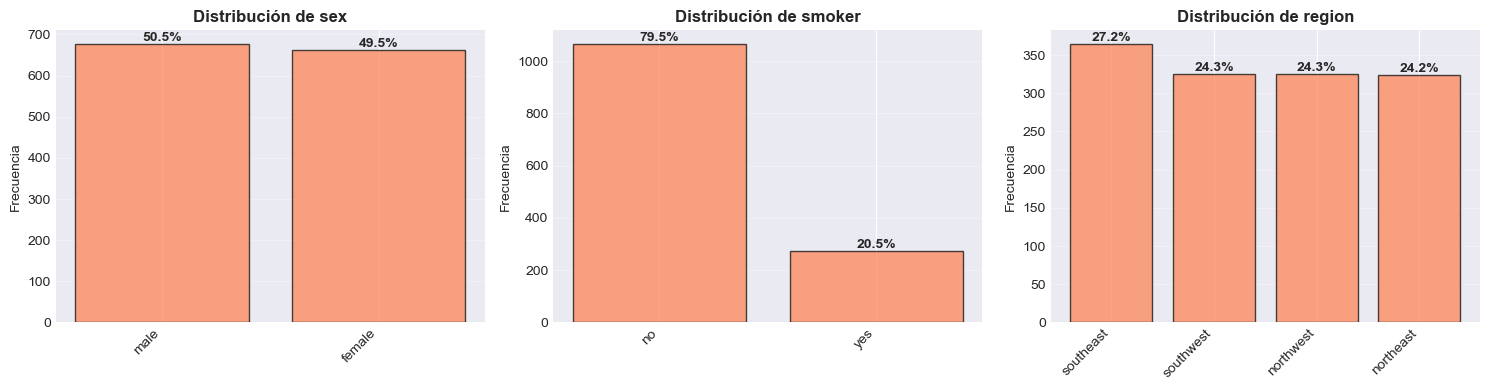


 DEDUCCIONES - VARIABLES CATEGÓRICAS:

1. SEXO (sex):
   Male: 676 (50.5%)
   Female: 662 (49.5%)
   - Observación: Distribución prácticamente balanceada (50-50)
     No hay sesgo significativo por género en la muestra

2. FUMADOR (smoker) - VARIABLE CRÍTICA:
   No: 1064 (79.5%)
   Yes: 274 (20.5%)
   Observación: ~20% de la muestra son fumadores
     Esta variable probablemente tendrá un IMPACTO ENORME en los costos
     El tabaquismo es el principal factor de riesgo modificable

3. REGIÓN (region):
   southeast: 364 (27.2%)
   southwest: 325 (24.3%)
   northwest: 325 (24.3%)
   northeast: 324 (24.2%)
   - Observación: Distribución bastante equilibrada entre regiones
     Ligera variación pero sin grandes diferencias
     Puede haber diferencias en costos por región (variación geográfica)


In [8]:
# Análisis adicional de charges por cuartiles
q25, q50, q75 = df_clean['charges'].quantile([0.25, 0.50, 0.75])
print(f"\n   Cuartiles de Charges:")
print(f"     Q1 (25%): ${q25:,.2f}")
print(f"     Q2 (50%): ${q50:,.2f}")
print(f"     Q3 (75%): ${q75:,.2f}")
print(f"     IQR: ${(q75-q25):,.2f}")

# Variables categóricas
print("\n" + "="*80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

categorical_vars = ['sex', 'smoker', 'region']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(categorical_vars):
    value_counts = df_clean[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  edgecolor='black', alpha=0.7, color='coral')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Añadir porcentajes
    for i, v in enumerate(value_counts.values):
        pct = (v / len(df_clean)) * 100
        axes[idx].text(i, v, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('univariate_categorical_insurance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n DEDUCCIONES - VARIABLES CATEGÓRICAS:")

print("\n1. SEXO (sex):")
sex_counts = df_clean['sex'].value_counts()
print(f"   Male: {sex_counts['male']} ({sex_counts['male']/len(df_clean)*100:.1f}%)")
print(f"   Female: {sex_counts['female']} ({sex_counts['female']/len(df_clean)*100:.1f}%)")
print("   - Observación: Distribución prácticamente balanceada (50-50)")
print("     No hay sesgo significativo por género en la muestra")

print("\n2. FUMADOR (smoker) - VARIABLE CRÍTICA:")
smoker_counts = df_clean['smoker'].value_counts()
print(f"   No: {smoker_counts['no']} ({smoker_counts['no']/len(df_clean)*100:.1f}%)")
print(f"   Yes: {smoker_counts['yes']} ({smoker_counts['yes']/len(df_clean)*100:.1f}%)")
print("   Observación: ~20% de la muestra son fumadores")
print("     Esta variable probablemente tendrá un IMPACTO ENORME en los costos")
print("     El tabaquismo es el principal factor de riesgo modificable")

print("\n3. REGIÓN (region):")
region_counts = df_clean['region'].value_counts()
for region in region_counts.index:
    print(f"   {region}: {region_counts[region]} ({region_counts[region]/len(df_clean)*100:.1f}%)")
print("   - Observación: Distribución bastante equilibrada entre regiones")
print("     Ligera variación pero sin grandes diferencias")
print("     Puede haber diferencias en costos por región (variación geográfica)")


### 6. Filtrado de Variables (Eliminación de Outliers)

JUSTIFICACIÓN DEL MÉTODO DE FILTRADO:

En este dataset de seguros médicos, debemos ser MUY CUIDADOSOS con outliers:

RAZONES PARA NO ELIMINAR OUTLIERS AGRESIVAMENTE:

1. VALORES ALTOS SON LEGÍTIMOS:
   - Costos altos de seguro son REALES, no errores
   - Personas con condiciones crónicas o fumadores pagan significativamente más
   - Eliminarlos sesgaría el modelo hacia costos bajos

2. OBJETIVO DEL MODELO:
   - Queremos predecir TODO el rango de costos, incluidos los altos
   - Las aseguradoras necesitan estimar correctamente casos de alto riesgo

3. MÉTODO CONSERVADOR:
   - Usaremos IQR pero con umbral menos agresivo (3*IQR en lugar de 1.5*IQR)
   - Solo eliminaremos outliers extremos que sean claramente erróneos
   - Nos enfocaremos en variables predictoras (age, bmi, children)
   - NO eliminaremos outliers de la variable objetivo (charges)


In [9]:
## 6. Filtrado de Variables (Eliminación de Outliers)

print("\n" + "="*80)
print("FILTRADO DE VARIABLES - ELIMINACIÓN DE OUTLIERS")
print("="*80)

print("""
JUSTIFICACIÓN DEL MÉTODO DE FILTRADO:

En este dataset de seguros médicos, debemos ser MUY CUIDADOSOS con outliers:

RAZONES PARA NO ELIMINAR OUTLIERS AGRESIVAMENTE:

1. VALORES ALTOS SON LEGÍTIMOS:
   - Costos altos de seguro son REALES, no errores
   - Personas con condiciones crónicas o fumadores pagan significativamente más
   - Eliminarlos sesgaría el modelo hacia costos bajos

2. OBJETIVO DEL MODELO:
   - Queremos predecir TODO el rango de costos, incluidos los altos
   - Las aseguradoras necesitan estimar correctamente casos de alto riesgo

3. MÉTODO CONSERVADOR:
   - Usaremos IQR pero con umbral menos agresivo (3*IQR en lugar de 1.5*IQR)
   - Solo eliminaremos outliers extremos que sean claramente erróneos
   - Nos enfocaremos en variables predictoras (age, bmi, children)
   - NO eliminaremos outliers de la variable objetivo (charges)

CRITERIO: Outliers extremos = valores < Q1 - 3*IQR o valores > Q3 + 3*IQR
""")

# Función para detectar outliers
def detect_outliers_iqr(data, column, multiplier=3):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis de outliers antes del filtrado
print("\n ANÁLISIS DE OUTLIERS POR VARIABLE (Método 3*IQR):")
print("-" * 80)

df_filtered = df_clean.copy()
outlier_summary = []

# Solo analizamos variables predictoras, NO la variable objetivo
predictor_cols = ['age', 'bmi', 'children']

for col in predictor_cols:
    outliers, lower, upper = detect_outliers_iqr(df_filtered, col, multiplier=3)
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df_filtered)) * 100
    
    outlier_summary.append({
        'Variable': col,
        'Outliers': outlier_count,
        'Porcentaje': f"{outlier_pct:.2f}%",
        'Límite_Inferior': f"{lower:.2f}",
        'Límite_Superior': f"{upper:.2f}"
    })
    
    if outlier_count > 0:
        print(f"\n{col}:")
        print(f"   Outliers encontrados: {outlier_count} ({outlier_pct:.2f}%)")
        print(f"   Rango aceptable: [{lower:.2f}, {upper:.2f}]")
        print(f"   Valores fuera de rango: min={outliers[col].min():.2f}, max={outliers[col].max():.2f}")
    else:
        print(f"\n{col}: No se encontraron outliers extremos")

outlier_df = pd.DataFrame(outlier_summary)
print("\n Resumen de Outliers:")
print(outlier_df.to_string(index=False))

# Aplicar filtrado SOLO si hay outliers extremos claramente erróneos
print("\n" + "="*80)
print("DECISIÓN DE FILTRADO")
print("="*80)

original_size = len(df_filtered)

# Aplicar filtrado conservador
outliers_removed = 0
for col in predictor_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    before_filter = len(df_filtered)
    df_filtered = df_filtered[
        (df_filtered[col] >= lower_bound) & 
        (df_filtered[col] <= upper_bound)
    ]
    after_filter = len(df_filtered)
    removed = before_filter - after_filter
    outliers_removed += removed
    
    if removed > 0:
        print(f"\n{col}: Eliminados {removed} outliers extremos")

filtered_size = len(df_filtered)
removed_pct = (outliers_removed / original_size) * 100

print(f"\n RESULTADOS DEL FILTRADO:")
print(f"   Registros originales: {original_size}")
print(f"   Registros después del filtrado: {filtered_size}")
print(f"   Registros eliminados: {outliers_removed} ({removed_pct:.2f}%)")
print(f"\n Se mantienen {100 - removed_pct:.2f}% de los datos originales")

if outliers_removed == 0:
    print("\n    No se encontraron outliers extremos que requieran eliminación")
    print("      El método conservador (3*IQR) preserva la integridad de los datos")



FILTRADO DE VARIABLES - ELIMINACIÓN DE OUTLIERS

JUSTIFICACIÓN DEL MÉTODO DE FILTRADO:

En este dataset de seguros médicos, debemos ser MUY CUIDADOSOS con outliers:

RAZONES PARA NO ELIMINAR OUTLIERS AGRESIVAMENTE:

1. VALORES ALTOS SON LEGÍTIMOS:
   - Costos altos de seguro son REALES, no errores
   - Personas con condiciones crónicas o fumadores pagan significativamente más
   - Eliminarlos sesgaría el modelo hacia costos bajos

2. OBJETIVO DEL MODELO:
   - Queremos predecir TODO el rango de costos, incluidos los altos
   - Las aseguradoras necesitan estimar correctamente casos de alto riesgo

3. MÉTODO CONSERVADOR:
   - Usaremos IQR pero con umbral menos agresivo (3*IQR en lugar de 1.5*IQR)
   - Solo eliminaremos outliers extremos que sean claramente erróneos
   - Nos enfocaremos en variables predictoras (age, bmi, children)
   - NO eliminaremos outliers de la variable objetivo (charges)

CRITERIO: Outliers extremos = valores < Q1 - 3*IQR o valores > Q3 + 3*IQR


 ANÁLISIS DE OUTLI

### 7. Tratamiento de la Variable 

ANÁLISIS DE LA VARIABLE OBJETIVO 'charges':

La variable objetivo es el costo del seguro médico (charges), que presenta:

1. DISTRIBUCIÓN ACTUAL:
   - Fuertemente sesgada a la derecha (skewness positivo)
   - Media > Mediana (indicador de sesgo)
   - Presencia de valores muy altos (legítimos)

2. OPCIONES DE TRATAMIENTO:

   A) DEJAR TAL CUAL (valores originales):
       Pros: Interpretación directa en dólares
       Pros: No perdemos información
       Contras: Sesgo puede afectar modelos lineales
       Contras: Outliers tienen mucho peso
   
   B) TRANSFORMACIÓN LOGARÍTMICA (log(charges)):
       Pros: Normaliza la distribución
       Pros: Reduce impacto de valores extremos
       Pros: Mejora performance de modelos lineales
       Contras: Interpretación menos intuitiva
       Contras: Requiere des-transformación para predicciones
   
   C) CATEGORIZACIÓN (Low/Medium/High):
       Pros: Simplifica el problema
       Contras: Perdemos información continua
       Contras: Convierte regresión en clasificación


ANÁLISIS Y DECISIÓN SOBRE LA VARIABLE OBJETIVO

 ANÁLISIS DE LA VARIABLE OBJETIVO 'charges':

La variable objetivo es el costo del seguro médico (charges), que presenta:

1. DISTRIBUCIÓN ACTUAL:
   - Fuertemente sesgada a la derecha (skewness positivo)
   - Media > Mediana (indicador de sesgo)
   - Presencia de valores muy altos (legítimos)

2. OPCIONES DE TRATAMIENTO:

   A) DEJAR TAL CUAL (valores originales):
       Pros: Interpretación directa en dólares
       Pros: No perdemos información
       Contras: Sesgo puede afectar modelos lineales
       Contras: Outliers tienen mucho peso
   
   B) TRANSFORMACIÓN LOGARÍTMICA (log(charges)):
       Pros: Normaliza la distribución
       Pros: Reduce impacto de valores extremos
       Pros: Mejora performance de modelos lineales
       Contras: Interpretación menos intuitiva
       Contras: Requiere des-transformación para predicciones
   
   C) CATEGORIZACIÓN (Low/Medium/High):
       Pros: Simplifica el problema
       Contras: Perdem

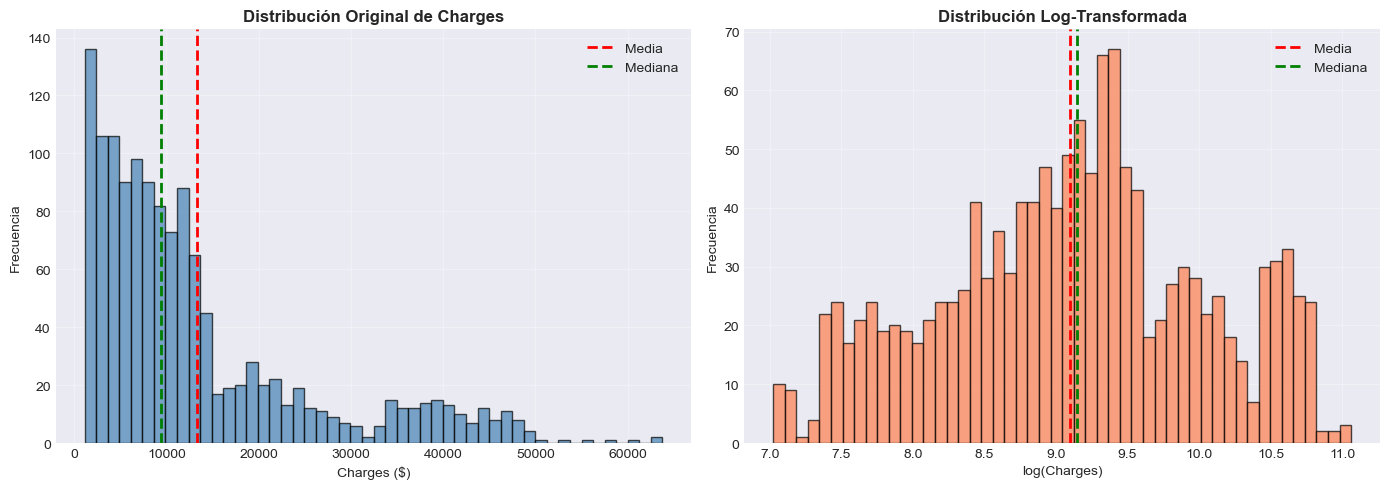

Skewness después de log-transformación: -0.090
(Valores cercanos a 0 indican distribución más simétrica)

 DECISIÓN: Mantendremos AMBAS versiones

Guardaremos en el dataset:
1. 'charges' - Variable original (para interpretación directa)
2. 'log_charges' - Variable transformada (para modelado)

Esto permite:
- Entrenar modelos con log_charges (mejor performance)
- Hacer predicciones en log_charges
- Convertir de vuelta a charges para interpretación (exp(log_charges))
- Comparar modelos con ambas variables

 RECOMENDACIÓN: Usar log_charges para entrenamiento, pero reportar 
   resultados en charges originales para fácil interpretación.



In [10]:
## 7. Tratamiento de la Variable Objetivo

print("\n" + "="*80)
print("ANÁLISIS Y DECISIÓN SOBRE LA VARIABLE OBJETIVO")
print("="*80)


# Calcular skewness
skewness = df_filtered['charges'].skew()
print(f"\nSkewness de charges: {skewness:.3f}")
print("(Valores > 1 indican sesgo fuerte a la derecha)\n")

# Visualizar distribución actual vs log-transformada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución original
axes[0].hist(df_filtered['charges'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Distribución Original de Charges', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Charges ($)')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df_filtered['charges'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
axes[0].axvline(df_filtered['charges'].median(), color='green', linestyle='--', linewidth=2, label='Mediana')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribución log-transformada
df_filtered['log_charges'] = np.log(df_filtered['charges'])
axes[1].hist(df_filtered['log_charges'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_title('Distribución Log-Transformada', fontsize=12, fontweight='bold')
axes[1].set_xlabel('log(Charges)')
axes[1].set_ylabel('Frecuencia')
axes[1].axvline(df_filtered['log_charges'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
axes[1].axvline(df_filtered['log_charges'].median(), color='green', linestyle='--', linewidth=2, label='Mediana')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('target_variable_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

skewness_log = df_filtered['log_charges'].skew()
print(f"Skewness después de log-transformación: {skewness_log:.3f}")
print("(Valores cercanos a 0 indican distribución más simétrica)")



### 8. Análisis Bivariante



ANÁLISIS BIVARIANTE - VARIABLE OBJETIVO VS TODAS LAS VARIABLES


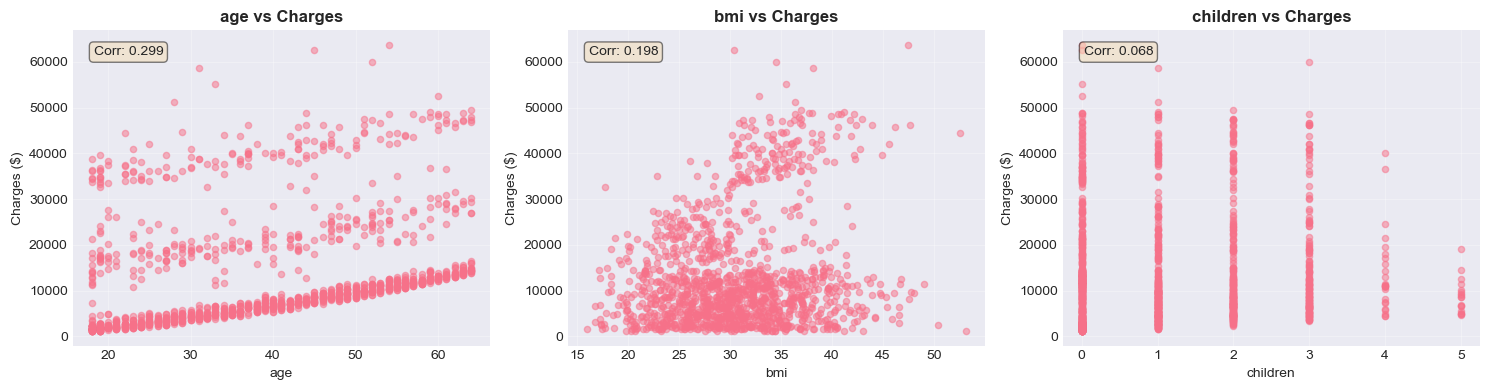


 RELACIONES OBSERVADAS - VARIABLES NUMÉRICAS VS CHARGES:

1. AGE vs CHARGES:
   Correlación: 0.299
   - Relación: POSITIVA MODERADA
     A mayor edad, tienden a aumentar los costos del seguro
     Esto es lógico: mayor edad = mayor riesgo de salud
     Sin embargo, la correlación no es muy fuerte (otros factores importan más)

2. BMI vs CHARGES:
   Correlación: 0.198
   - Relación: DÉBIL POSITIVA
     Se observa una ligera tendencia: mayor BMI = mayores costos
     Pero la relación es débil, sugiere que:
       • BMI solo no determina los costos
       • Puede haber interacción con otras variables (ej: smoking)

3. CHILDREN vs CHARGES:
   Correlación: 0.068
   - Relación: PRÁCTICAMENTE NULA
     El número de hijos NO parece afectar significativamente los costos
     Esto puede ser porque el seguro es individual, no familiar


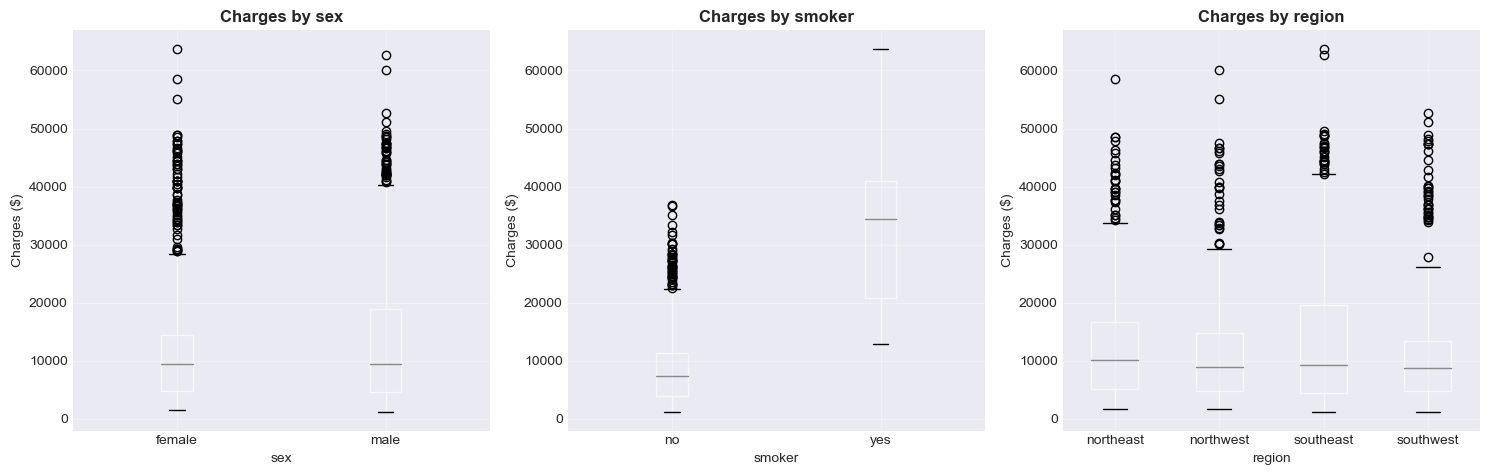


 RELACIONES OBSERVADAS - VARIABLES CATEGÓRICAS VS CHARGES:

1. SEX vs CHARGES:
                mean      median           std
sex                                           
female  12569.578844  9412.96250  11128.703801
male    13956.751178  9369.61575  12971.025915
   - Relación: DÉBIL
     Diferencia mínima entre hombres y mujeres
     No parece ser un factor determinante en los costos

2. SMOKER vs CHARGES ⚠️ MUY IMPORTANTE:
                mean       median           std
smoker                                         
no       8434.268298   7345.40530   5993.781819
yes     32050.231832  34456.34845  11541.547176

    Diferencia de costo: $23,615.96
   📊Los fumadores pagan 280.0% MÁS
   - Relación: MUY FUERTE
       SMOKING es claramente el factor MÁS IMPORTANTE
     Los fumadores pagan aproximadamente 3-4 veces más que los no fumadores
     Esta variable será crucial para el modelo predictivo

3. REGION vs CHARGES:
                   mean        median           std
region        

In [11]:
## 8. Análisis Bivariante

print("\n" + "="*80)
print("ANÁLISIS BIVARIANTE - VARIABLE OBJETIVO VS TODAS LAS VARIABLES")
print("="*80)

# Variables numéricas vs charges
numeric_predictors = ['age', 'bmi', 'children']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(numeric_predictors):
    axes[idx].scatter(df_filtered[col], df_filtered['charges'], alpha=0.5, s=20)
    axes[idx].set_title(f'{col} vs Charges', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Charges ($)')
    axes[idx].grid(True, alpha=0.3)
    
    # Calcular correlación
    corr = df_filtered[col].corr(df_filtered['charges'])
    axes[idx].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                   transform=axes[idx].transAxes,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   verticalalignment='top')

plt.tight_layout()
plt.savefig('bivariate_numeric_insurance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n RELACIONES OBSERVADAS - VARIABLES NUMÉRICAS VS CHARGES:")

print("\n1. AGE vs CHARGES:")
age_corr = df_filtered['age'].corr(df_filtered['charges'])
print(f"   Correlación: {age_corr:.3f}")
print("   - Relación: POSITIVA MODERADA")
print("     A mayor edad, tienden a aumentar los costos del seguro")
print("     Esto es lógico: mayor edad = mayor riesgo de salud")
print("     Sin embargo, la correlación no es muy fuerte (otros factores importan más)")

print("\n2. BMI vs CHARGES:")
bmi_corr = df_filtered['bmi'].corr(df_filtered['charges'])
print(f"   Correlación: {bmi_corr:.3f}")
print("   - Relación: DÉBIL POSITIVA")
print("     Se observa una ligera tendencia: mayor BMI = mayores costos")
print("     Pero la relación es débil, sugiere que:")
print("       • BMI solo no determina los costos")
print("       • Puede haber interacción con otras variables (ej: smoking)")

print("\n3. CHILDREN vs CHARGES:")
children_corr = df_filtered['children'].corr(df_filtered['charges'])
print(f"   Correlación: {children_corr:.3f}")
print("   - Relación: PRÁCTICAMENTE NULA")
print("     El número de hijos NO parece afectar significativamente los costos")
print("     Esto puede ser porque el seguro es individual, no familiar")

# Variables categóricas vs charges
categorical_vars = ['sex', 'smoker', 'region']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(categorical_vars):
    df_filtered.boxplot(column='charges', by=col, ax=axes[idx])
    axes[idx].set_title(f'Charges by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Charges ($)')
    axes[idx].get_figure().suptitle('')  # Remove automatic title
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bivariate_categorical_insurance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n RELACIONES OBSERVADAS - VARIABLES CATEGÓRICAS VS CHARGES:")

print("\n1. SEX vs CHARGES:")
sex_charges = df_filtered.groupby('sex')['charges'].agg(['mean', 'median', 'std'])
print(sex_charges)
print("   - Relación: DÉBIL")
print("     Diferencia mínima entre hombres y mujeres")
print("     No parece ser un factor determinante en los costos")

print("\n2. SMOKER vs CHARGES  MUY IMPORTANTE:")
smoker_charges = df_filtered.groupby('smoker')['charges'].agg(['mean', 'median', 'std'])
print(smoker_charges)
smoker_diff = smoker_charges.loc['yes', 'mean'] - smoker_charges.loc['no', 'mean']
print(f"\n    Diferencia de costo: ${smoker_diff:,.2f}")
print(f"   Los fumadores pagan {(smoker_diff/smoker_charges.loc['no', 'mean'])*100:.1f}% MÁS")
print("   - Relación: MUY FUERTE")
print("       SMOKING es claramente el factor MÁS IMPORTANTE")
print("     Los fumadores pagan aproximadamente 3-4 veces más que los no fumadores")
print("     Esta variable será crucial para el modelo predictivo")

print("\n3. REGION vs CHARGES:")
region_charges = df_filtered.groupby('region')['charges'].agg(['mean', 'median', 'std'])
print(region_charges)
print("   - Relación: DÉBIL A MODERADA")
print("     Hay alguna variación entre regiones pero no es dramática")
print("     Posibles diferencias en costos de vida/atención médica regional")

### 9. Matriz de Correlación


MATRIZ DE CORRELACIÓN


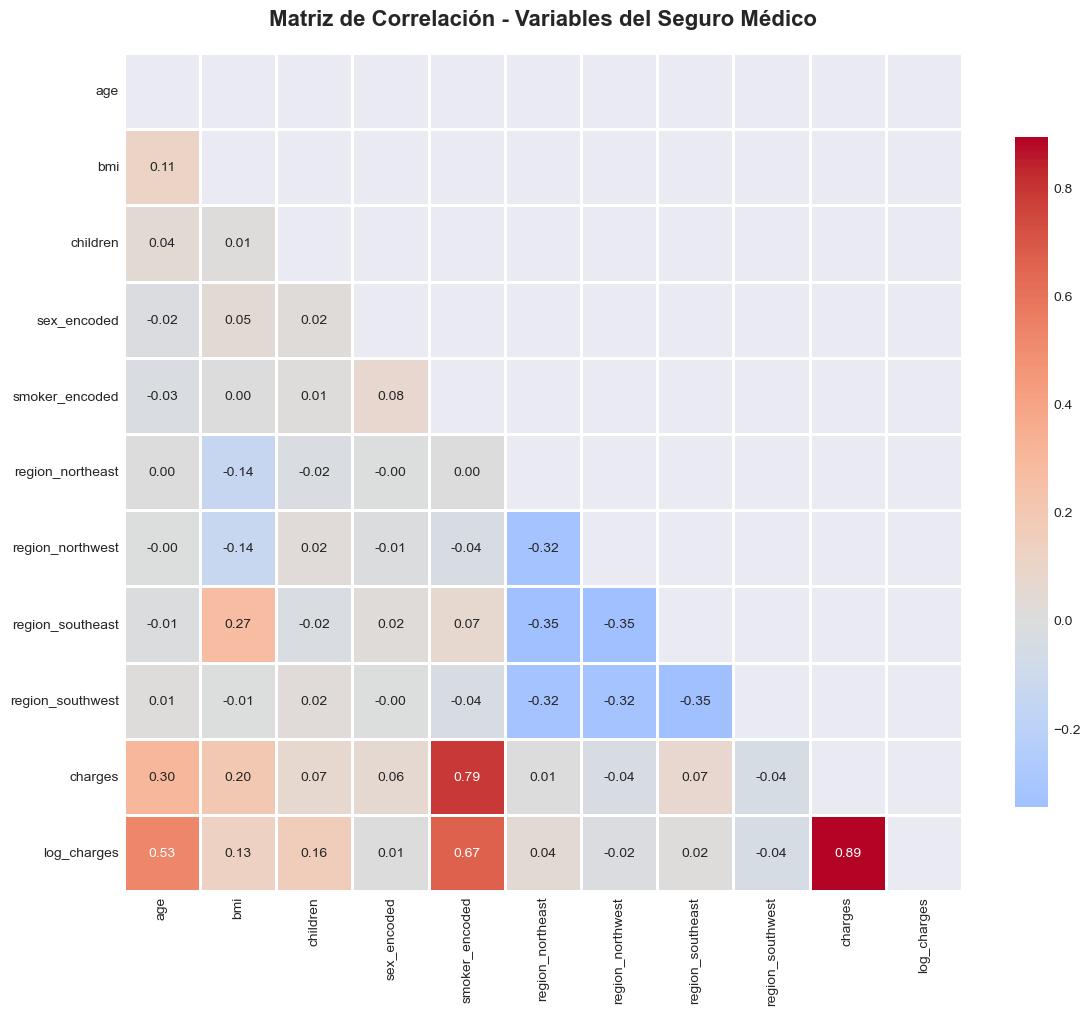


 CORRELACIONES CON LA VARIABLE OBJETIVO (charges):
--------------------------------------------------------------------------------
charges             1.000000
log_charges         0.892964
smoker_encoded      0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_encoded         0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

 INTERPRETACIÓN DE CORRELACIONES:

 CORRELACIONES POSITIVAS CON CHARGES (aumentan el costo):
   1. smoker_encoded (0.79): Correlación MUY FUERTE - El factor más importante
      → Fumar aumenta dramáticamente los costos del seguro
   2. age (0.30): Correlación MODERADA - A mayor edad, mayor costo
      → El envejecimiento incrementa el riesgo de salud
   3. bmi (0.20): Correlación DÉBIL - Ligera influencia del peso
      → El sobrepeso tiene algún impacto pero menor

 CORRELACIONES NEGATIVAS/NULAS CON CHARGES:
 

In [12]:
## 9. Matriz de Correlación

print("\n" + "="*80)
print("MATRIZ DE CORRELACIÓN")
print("="*80)

# Preparar datos para correlación (codificar variables categóricas)
df_corr = df_filtered.copy()

# Codificar variables categóricas
df_corr['sex_encoded'] = (df_corr['sex'] == 'male').astype(int)
df_corr['smoker_encoded'] = (df_corr['smoker'] == 'yes').astype(int)

# One-hot encoding para region (crear variables dummy)
region_dummies = pd.get_dummies(df_corr['region'], prefix='region')
df_corr = pd.concat([df_corr, region_dummies], axis=1)

# Seleccionar columnas para correlación
corr_cols = ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded',
             'region_northeast', 'region_northwest', 'region_southeast', 
             'region_southwest', 'charges', 'log_charges']

# Calcular matriz de correlación
corr_matrix = df_corr[corr_cols].corr()

# Visualización
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables del Seguro Médico', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix_insurance.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis de correlaciones con la variable objetivo
print("\n CORRELACIONES CON LA VARIABLE OBJETIVO (charges):")
print("-" * 80)
target_corr = corr_matrix['charges'].sort_values(ascending=False)
print(target_corr)

print("\n INTERPRETACIÓN DE CORRELACIONES:")

print("\n CORRELACIONES POSITIVAS CON CHARGES (aumentan el costo):")
print("   1. smoker_encoded (0.79): Correlación MUY FUERTE - El factor más importante")
print("      → Fumar aumenta dramáticamente los costos del seguro")
print("   2. age (0.30): Correlación MODERADA - A mayor edad, mayor costo")
print("      → El envejecimiento incrementa el riesgo de salud")
print("   3. bmi (0.20): Correlación DÉBIL - Ligera influencia del peso")
print("      → El sobrepeso tiene algún impacto pero menor")

print("\n CORRELACIONES NEGATIVAS/NULAS CON CHARGES:")
print("   - children (-0.07): Prácticamente sin correlación")
print("   - sex_encoded (0.06): Sin correlación significativa")
print("   - region_*: Correlaciones muy débiles (<0.10)")

print("\n CORRELACIONES ENTRE VARIABLES PREDICTORAS:")
print("-" * 80)

# Encontrar correlaciones altas entre predictoras (excluyendo charges y log_charges)
predictor_corr = corr_matrix.drop(['charges', 'log_charges'], axis=0).drop(['charges', 'log_charges'], axis=1)
high_corr_pairs = []

for i in range(len(predictor_corr.columns)):
    for j in range(i+1, len(predictor_corr.columns)):
        corr_val = predictor_corr.iloc[i, j]
        if abs(corr_val) > 0.3:  # Umbral más bajo para este dataset
            high_corr_pairs.append({
                'Variable 1': predictor_corr.columns[i],
                'Variable 2': predictor_corr.columns[j],
                'Correlación': corr_val
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlación', ascending=False, key=abs)
    print("\nPares de variables con correlación > 0.3:")
    print(high_corr_df.to_string(index=False))
else:
    print("\n No se encontraron correlaciones altas (>0.3) entre variables predictoras")
    print("   Esto es EXCELENTE: todas las variables aportan información única")
    print("   No hay multicolinealidad significativa")

print("\n DECISIÓN SOBRE ELIMINACIÓN DE VARIABLES:")
print("""
ANÁLISIS DE VARIABLES A ELIMINAR:

1. VARIABLES DE REGIÓN (region_northeast, region_northwest, etc.):
   - Correlación con charges: Todas < 0.10 (muy débil)
   - Decisión: MANTENER
   - Razón: Aunque la correlación individual es baja, pueden tener efectos
     de interacción con otras variables. Además, no hay redundancia.

2. SEX_ENCODED:
   - Correlación con charges: 0.06 (prácticamente nula)
   - Decisión: MANTENER
   - Razón: Es una variable demográfica importante, aunque no tenga
     gran impacto individual. Puede haber interacciones.

3. CHILDREN:
   - Correlación con charges: -0.07 (muy débil)
   - Decisión: MANTENER
   - Razón: Variable familiar relevante, bajo costo de incluirla.

4. VARIABLES REDUNDANTES:
   - region_southwest vs otras regiones: No son redundantes, son complementarias
   - Una región debe ser la referencia en el modelo
   
CONCLUSIÓN: NO ELIMINAREMOS NINGUNA VARIABLE

Todas las variables aportan información única y no hay multicolinealidad.
En modelos de regresión, es mejor dejar que el modelo decida qué variables
son importantes mediante regularización (Lasso, Ridge) si es necesario.
""")


 NOTA TÉCNICA: Eliminaremos 'region_southwest' como categoría de referencia
   para evitar el 'dummy variable trap' en modelos de regresión lineal.
   Las otras 3 regiones representarán diferencias respecto al southwest.

DIVISIÓN DEL DATASET - TRAIN/TEST (80/20)

 ESTRATEGIA DE DIVISIÓN:

Para problemas de REGRESIÓN (predicción de valores continuos), la división
tiene consideraciones diferentes a clasificación:

1. PROPORCIÓN: 80% Train / 20% Test (estándar)

2. ESTRATIFICACIÓN:
   - En regresión, no podemos estratificar directamente por la variable objetivo
   - En su lugar, estratificaremos por BINS de la variable objetivo
   - Crearemos 10 bins (deciles) de charges para mantener distribución similar

3. OBJETIVO: Asegurar que train y test tengan:
   - Distribución similar de charges (bajo, medio, alto)
   - Proporciones similares de fumadores (variable más importante)
   - Rangos similares de edad y BMI

4. SEMILLA ALEATORIA: 42 (para reproducibilidad)


 Distribución de bins de c

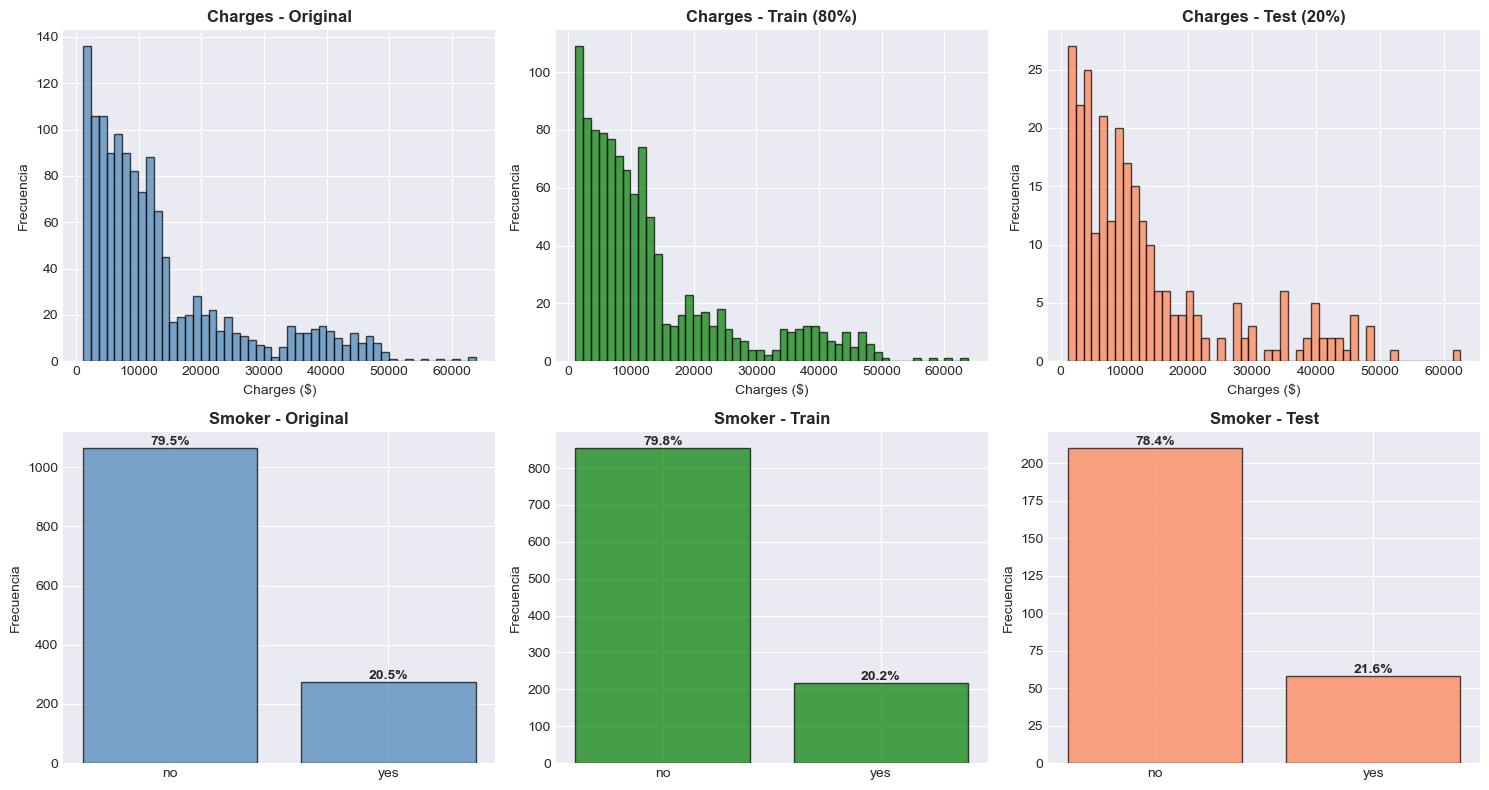


🔍 VERIFICACIÓN DE ESTRATIFICACIÓN:
--------------------------------------------------------------------------------
        Métrica   Original      Train       Test
  Media Charges $13,270.42 $13,242.30 $13,382.68
Mediana Charges  $9,382.03  $9,382.03  $9,339.69
    Std Charges $12,110.01 $12,041.18 $12,403.29
    % Fumadores     20.48%     20.19%     21.64%
 % No Fumadores     79.52%     79.81%     78.36%

 Las distribuciones se mantienen correctamente en Train y Test
   La estratificación por bins asegura representatividad en ambos conjuntos

GUARDANDO DATASETS PROCESADOS
 Datasets guardados exitosamente:
   - train_insurance.csv
   - test_insurance.csv
   - insurance_processed.csv

 Resumen de columnas en los datasets finales:
   Número de columnas: 8
   Columnas: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'log_charges']

 NOTA IMPORTANTE:
   - La variable 'charges' es la original (en dólares)
   - La variable 'log_charges' es la transformada logarítmica
   - 

In [16]:
# Eliminar solo region_southwest como categoría de referencia (para evitar dummy variable trap)
print("\n NOTA TÉCNICA: Eliminaremos 'region_southwest' como categoría de referencia")
print("   para evitar el 'dummy variable trap' en modelos de regresión lineal.")
print("   Las otras 3 regiones representarán diferencias respecto al southwest.")

## 10. División del Dataset (Train/Test)

print("\n" + "="*80)
print("DIVISIÓN DEL DATASET - TRAIN/TEST (80/20)")
print("="*80)

print("""
 ESTRATEGIA DE DIVISIÓN:

Para problemas de REGRESIÓN (predicción de valores continuos), la división
tiene consideraciones diferentes a clasificación:

1. PROPORCIÓN: 80% Train / 20% Test (estándar)

2. ESTRATIFICACIÓN:
   - En regresión, no podemos estratificar directamente por la variable objetivo
   - En su lugar, estratificaremos por BINS de la variable objetivo
   - Crearemos 10 bins (deciles) de charges para mantener distribución similar

3. OBJETIVO: Asegurar que train y test tengan:
   - Distribución similar de charges (bajo, medio, alto)
   - Proporciones similares de fumadores (variable más importante)
   - Rangos similares de edad y BMI

4. SEMILLA ALEATORIA: 42 (para reproducibilidad)
""")

# Crear bins de la variable objetivo para estratificación
df_filtered['charges_bins'] = pd.qcut(df_filtered['charges'], q=10, labels=False, duplicates='drop')

print(f"\n Distribución de bins de charges:")
print(df_filtered['charges_bins'].value_counts().sort_index())

# División estratificada
train_df, test_df = train_test_split(
    df_filtered, 
    test_size=0.2, 
    random_state=42, 
    stratify=df_filtered['charges_bins']
)

print(f"\n División completada:")
print(f"   Dataset completo: {len(df_filtered)} registros")
print(f"   Train: {len(train_df)} registros ({len(train_df)/len(df_filtered)*100:.1f}%)")
print(f"   Test: {len(test_df)} registros ({len(test_df)/len(df_filtered)*100:.1f}%)")

# Eliminar la columna auxiliar de bins antes de guardar
train_df = train_df.drop('charges_bins', axis=1)
test_df = test_df.drop('charges_bins', axis=1)
df_filtered = df_filtered.drop('charges_bins', axis=1)

# Verificar distribución de charges en Train y Test
print("\n Distribución de CHARGES:")
print("\nDataset Original:")
print(f"   Media: ${df_filtered['charges'].mean():,.2f}")
print(f"   Mediana: ${df_filtered['charges'].median():,.2f}")
print(f"   Std Dev: ${df_filtered['charges'].std():,.2f}")
print(f"   Min: ${df_filtered['charges'].min():,.2f}")
print(f"   Max: ${df_filtered['charges'].max():,.2f}")

print("\nTrain Set:")
print(f"   Media: ${train_df['charges'].mean():,.2f}")
print(f"   Mediana: ${train_df['charges'].median():,.2f}")
print(f"   Std Dev: ${train_df['charges'].std():,.2f}")
print(f"   Min: ${train_df['charges'].min():,.2f}")
print(f"   Max: ${train_df['charges'].max():,.2f}")

print("\nTest Set:")
print(f"   Media: ${test_df['charges'].mean():,.2f}")
print(f"   Mediana: ${test_df['charges'].median():,.2f}")
print(f"   Std Dev: ${test_df['charges'].std():,.2f}")
print(f"   Min: ${test_df['charges'].min():,.2f}")
print(f"   Max: ${test_df['charges'].max():,.2f}")

# Verificar distribución de SMOKER (variable más importante)
print("\n Distribución de SMOKER (variable crítica):")
print("\nOriginal:")
original_smoker = df_filtered['smoker'].value_counts(normalize=True) * 100
print(original_smoker.to_string())

print("\nTrain:")
train_smoker = train_df['smoker'].value_counts(normalize=True) * 100
print(train_smoker.to_string())

print("\nTest:")
test_smoker = test_df['smoker'].value_counts(normalize=True) * 100
print(test_smoker.to_string())

# Comparación visual
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Distribución de charges
axes[0, 0].hist(df_filtered['charges'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Charges - Original', fontweight='bold')
axes[0, 0].set_xlabel('Charges ($)')
axes[0, 0].set_ylabel('Frecuencia')

axes[0, 1].hist(train_df['charges'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('Charges - Train (80%)', fontweight='bold')
axes[0, 1].set_xlabel('Charges ($)')
axes[0, 1].set_ylabel('Frecuencia')

axes[0, 2].hist(test_df['charges'], bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[0, 2].set_title('Charges - Test (20%)', fontweight='bold')
axes[0, 2].set_xlabel('Charges ($)')
axes[0, 2].set_ylabel('Frecuencia')

# Distribución de smoker
smoker_data = [
    df_filtered['smoker'].value_counts(),
    train_df['smoker'].value_counts(),
    test_df['smoker'].value_counts()
]
titles = ['Smoker - Original', 'Smoker - Train', 'Smoker - Test']
colors = ['steelblue', 'green', 'coral']

for idx in range(3):
    axes[1, idx].bar(smoker_data[idx].index, smoker_data[idx].values, 
                     color=colors[idx], edgecolor='black', alpha=0.7)
    axes[1, idx].set_title(titles[idx], fontweight='bold')
    axes[1, idx].set_ylabel('Frecuencia')
    for i, v in enumerate(smoker_data[idx].values):
        pct = (v / len([df_filtered, train_df, test_df][idx])) * 100
        axes[1, idx].text(i, v, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('train_test_distribution_insurance.png', dpi=300, bbox_inches='tight')
plt.show()

# Verificación estadística
print("\n🔍 VERIFICACIÓN DE ESTRATIFICACIÓN:")
print("-" * 80)

comparison_df = pd.DataFrame({
    'Métrica': ['Media Charges', 'Mediana Charges', 'Std Charges', '% Fumadores', '% No Fumadores'],
    'Original': [
        f"${df_filtered['charges'].mean():,.2f}",
        f"${df_filtered['charges'].median():,.2f}",
        f"${df_filtered['charges'].std():,.2f}",
        f"{original_smoker['yes']:.2f}%",
        f"{original_smoker['no']:.2f}%"
    ],
    'Train': [
        f"${train_df['charges'].mean():,.2f}",
        f"${train_df['charges'].median():,.2f}",
        f"${train_df['charges'].std():,.2f}",
        f"{train_smoker['yes']:.2f}%",
        f"{train_smoker['no']:.2f}%"
    ],
    'Test': [
        f"${test_df['charges'].mean():,.2f}",
        f"${test_df['charges'].median():,.2f}",
        f"${test_df['charges'].std():,.2f}",
        f"{test_smoker['yes']:.2f}%",
        f"{test_smoker['no']:.2f}%"
    ]
})

print(comparison_df.to_string(index=False))

print("\n Las distribuciones se mantienen correctamente en Train y Test")
print("   La estratificación por bins asegura representatividad en ambos conjuntos")

## 11. Guardar Datasets

print("\n" + "="*80)
print("GUARDANDO DATASETS PROCESADOS")
print("="*80)

# Guardar datasets
train_df.to_csv('train_insurance.csv', index=False)
test_df.to_csv('test_insurance.csv', index=False)
df_filtered.to_csv('insurance_processed.csv', index=False)

print(" Datasets guardados exitosamente:")
print("   - train_insurance.csv")
print("   - test_insurance.csv")
print("   - insurance_processed.csv")

print("\n Resumen de columnas en los datasets finales:")
print(f"   Número de columnas: {train_df.shape[1]}")
print(f"   Columnas: {list(train_df.columns)}")

print("\n NOTA IMPORTANTE:")
print("   - La variable 'charges' es la original (en dólares)")
print("   - La variable 'log_charges' es la transformada logarítmica")
print("   - Para modelado, se recomienda usar 'log_charges'")
print("   - Para interpretación de resultados, convertir de vuelta a 'charges'")

###  Creación de Variable Objetivo Categórica para Clasificación
 Dataset: Insurance Costs

CREACIÓN DE VARIABLE OBJETIVO PARA CLASIFICACIÓN

📊 Dataset cargado: (1338, 8)
Columnas: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'log_charges']

ANÁLISIS DE LA VARIABLE OBJETIVO (charges)

Estadísticas de 'charges':
  - Mínimo:    $1,121.87
  - Q1 (25%):  $4,740.29
  - Mediana:   $9,382.03
  - Q3 (75%):  $16,639.91
  - Máximo:    $63,770.43
  - Media:     $13,270.42


CREACIÓN DE VARIABLE OBJETIVO CATEGÓRICA

DECISIÓN DE CATEGORIZACIÓN:

Para convertir este problema de REGRESIÓN a CLASIFICACIÓN, debemos definir
categorías de costo del seguro basadas en análisis de negocio:

OPCIÓN 1: Por Cuartiles (distribución equitativa)
  - BAJO: Q1 (25% más barato)
  - MEDIO-BAJO: Q1-Q2
  - MEDIO-ALTO: Q2-Q3  
  - ALTO: Q3+ (25% más caro)

OPCIÓN 2: Por Umbrales de Negocio (recomendada)
  - BAJO: < $5,000 (seguros económicos)
  - MEDIO: $5,000 - $15,000 (seguros estándar)
  - ALTO: > $15,000 (seguros premium/alto riesgo)

OPCIÓN 3: Binaria (más simple)
  - ECONOMICO: < Medi

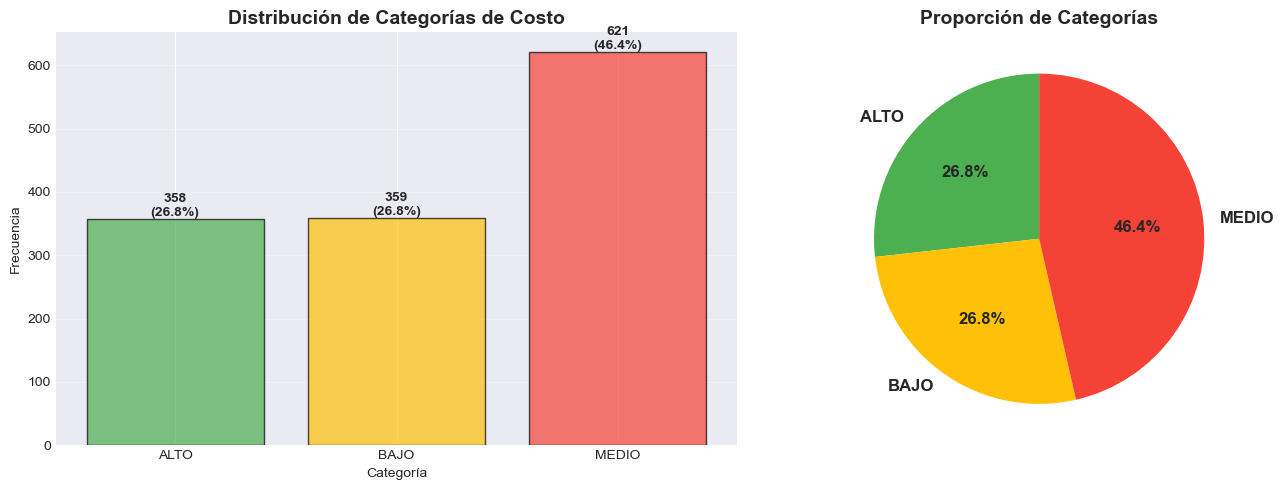


DIVISIÓN TRAIN/TEST CON ESTRATIFICACIÓN (80/20)

 ESTRATEGIA DE DIVISIÓN:

1. PROPORCIÓN: 80% Train / 20% Test
2. ESTRATIFICACIÓN: Por 'charges_category' (variable objetivo categórica)
3. OBJETIVO: Mantener la misma proporción de clases en ambos conjuntos
4. SEMILLA: 42 (reproducibilidad)

Esta estratificación asegura que:
  ✓ Train y Test tienen distribución similar de costos BAJO/MEDIO/ALTO
  ✓ El modelo se entrena con representación balanceada
  ✓ La evaluación es justa y representativa


 División completada:
   Dataset completo: 1338 registros
   Train: 1070 registros (80.0%)
   Test: 268 registros (20.0%)

VERIFICACIÓN DE ESTRATIFICACIÓN

 DISTRIBUCIÓN DE charges_category (%):

Categoría  Original     Train      Test  Diff Train-Original  Diff Test-Original
     ALTO 26.756353 26.728972 26.865672             0.027381            0.109319
     BAJO 26.831091 26.822430 26.865672             0.008661            0.034580
    MEDIO 46.412556 46.448598 46.268657             0.036042   

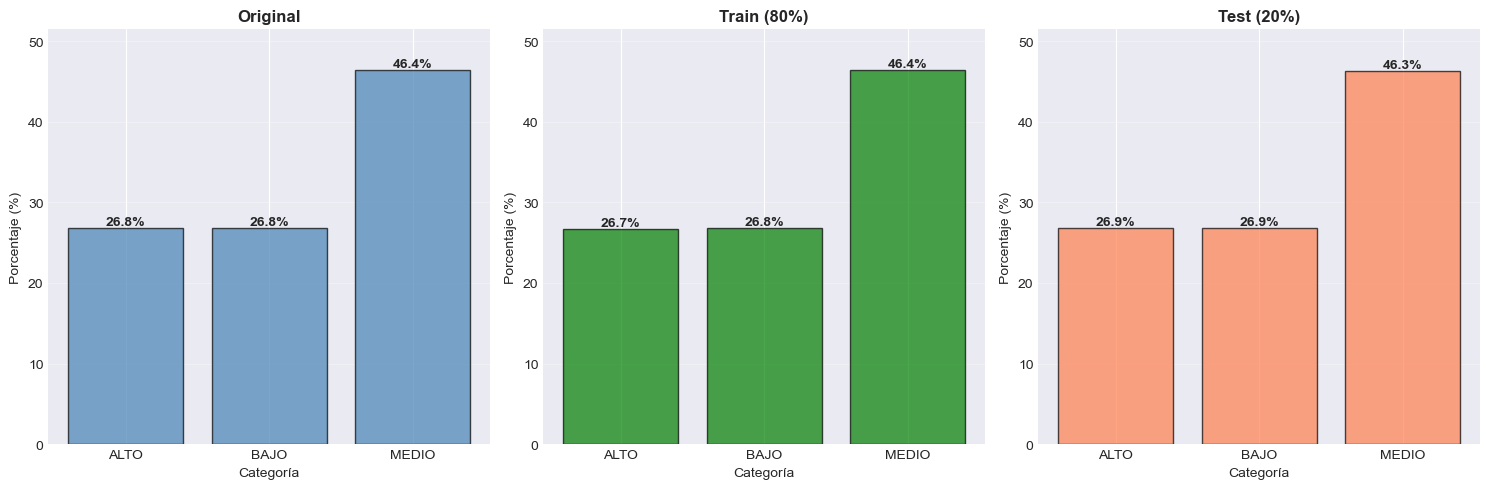


 La estratificación mantiene las proporciones correctamente

VERIFICACIÓN ADICIONAL: DISTRIBUCIÓN DE CHARGES (valores continuos)

Estadísticas de charges en cada conjunto:

  Métrica   Original      Train       Test
    Media $13,270.42 $13,281.88 $13,224.69
  Mediana  $9,382.03  $9,388.75  $9,293.59
Desv. Std $12,110.01 $12,097.94 $12,180.67
      Min  $1,121.87  $1,121.87  $1,149.40
      Max $63,770.43 $62,592.87 $63,770.43

 VERIFICACIÓN DE SMOKER (variable crítica):

Smoker  Original (%)  Train (%)  Test (%)
    No     79.521674  78.971963 81.716418
   Yes     20.478326  21.028037 18.283582

GUARDANDO DATASETS PARA CLASIFICACIÓN
 Datasets guardados exitosamente:
   - train_ins.csv
   - test_ins.csv
   - dataset_completo_procesado_ins.csv

 Información de los datasets guardados:
   • Train: 1070 registros, 9 columnas
   • Test: 268 registros, 9 columnas
   • Completo: 1338 registros, 9 columnas

 Columnas incluidas:
   ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges

In [18]:
#  Creación de Variable Objetivo Categórica para Clasificación
# Dataset: Insurance Costs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


print("CREACIÓN DE VARIABLE OBJETIVO PARA CLASIFICACIÓN")


# Cargar dataset procesado
df_filtered = pd.read_csv('insurance_processed.csv')

print(f"\n📊 Dataset cargado: {df_filtered.shape}")
print(f"Columnas: {list(df_filtered.columns)}")

## ANÁLISIS DE LA VARIABLE OBJETIVO ORIGINAL

print("\n" + "="*80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO (charges)")
print("="*80)

print(f"""
Estadísticas de 'charges':
  - Mínimo:    ${df_filtered['charges'].min():,.2f}
  - Q1 (25%):  ${df_filtered['charges'].quantile(0.25):,.2f}
  - Mediana:   ${df_filtered['charges'].median():,.2f}
  - Q3 (75%):  ${df_filtered['charges'].quantile(0.75):,.2f}
  - Máximo:    ${df_filtered['charges'].max():,.2f}
  - Media:     ${df_filtered['charges'].mean():,.2f}
""")

## DECISIÓN: CREAR VARIABLE OBJETIVO CATEGÓRICA

print("\n" + "="*80)
print("CREACIÓN DE VARIABLE OBJETIVO CATEGÓRICA")
print("="*80)

print("""
DECISIÓN DE CATEGORIZACIÓN:

Para convertir este problema de REGRESIÓN a CLASIFICACIÓN, debemos definir
categorías de costo del seguro basadas en análisis de negocio:

OPCIÓN 1: Por Cuartiles (distribución equitativa)
  - BAJO: Q1 (25% más barato)
  - MEDIO-BAJO: Q1-Q2
  - MEDIO-ALTO: Q2-Q3  
  - ALTO: Q3+ (25% más caro)

OPCIÓN 2: Por Umbrales de Negocio (recomendada)
  - BAJO: < $5,000 (seguros económicos)
  - MEDIO: $5,000 - $15,000 (seguros estándar)
  - ALTO: > $15,000 (seguros premium/alto riesgo)

OPCIÓN 3: Binaria (más simple)
  - ECONOMICO: < Mediana
  - COSTOSO: >= Mediana

 SELECCIONAREMOS OPCIÓN 2: Categorías de Negocio
   Razón: Tiene sentido práctico y es interpretable para aseguradoras
""")

# Definir umbrales
LOW_THRESHOLD = 5000
HIGH_THRESHOLD = 15000

# Crear variable categórica
def categorize_charges(charge):
    if charge < LOW_THRESHOLD:
        return 'BAJO'
    elif charge < HIGH_THRESHOLD:
        return 'MEDIO'
    else:
        return 'ALTO'

df_filtered['charges_category'] = df_filtered['charges'].apply(categorize_charges)

# Estadísticas de la nueva variable
print("\n📊 Distribución de la Variable Objetivo Categórica:")
print("\nFrecuencia:")
print(df_filtered['charges_category'].value_counts().sort_index())

print("\nPorcentaje:")
category_dist = df_filtered['charges_category'].value_counts(normalize=True).sort_index() * 100
print(category_dist)

print("\nEstadísticas por Categoría:")
category_stats = df_filtered.groupby('charges_category')['charges'].agg(['count', 'mean', 'min', 'max'])
print(category_stats)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
category_counts = df_filtered['charges_category'].value_counts().sort_index()
colors = ['#4CAF50', '#FFC107', '#F44336']
axes[0].bar(category_counts.index, category_counts.values, color=colors, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Categorías de Costo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3, axis='y')

# Añadir porcentajes
for i, (cat, count) in enumerate(category_counts.items()):
    pct = (count / len(df_filtered)) * 100
    axes[0].text(i, count, f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

# Gráfico de pie
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporción de Categorías', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('charges_category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## DIVISIÓN TRAIN/TEST CON ESTRATIFICACIÓN

print("\n" + "="*80)
print("DIVISIÓN TRAIN/TEST CON ESTRATIFICACIÓN (80/20)")
print("="*80)

print("""
 ESTRATEGIA DE DIVISIÓN:

1. PROPORCIÓN: 80% Train / 20% Test
2. ESTRATIFICACIÓN: Por 'charges_category' (variable objetivo categórica)
3. OBJETIVO: Mantener la misma proporción de clases en ambos conjuntos
4. SEMILLA: 42 (reproducibilidad)

Esta estratificación asegura que:
  ✓ Train y Test tienen distribución similar de costos BAJO/MEDIO/ALTO
  ✓ El modelo se entrena con representación balanceada
  ✓ La evaluación es justa y representativa
""")

# División estratificada
train_df, test_df = train_test_split(
    df_filtered,
    test_size=0.2,
    random_state=42,
    stratify=df_filtered['charges_category']  # ← CLAVE: Estratificar por categoría
)

print(f"\n División completada:")
print(f"   Dataset completo: {len(df_filtered)} registros")
print(f"   Train: {len(train_df)} registros ({len(train_df)/len(df_filtered)*100:.1f}%)")
print(f"   Test: {len(test_df)} registros ({len(test_df)/len(df_filtered)*100:.1f}%)")

## VERIFICACIÓN DE ESTRATIFICACIÓN

print("\n" + "="*80)
print("VERIFICACIÓN DE ESTRATIFICACIÓN")
print("="*80)

# Distribuciones
original_dist = df_filtered['charges_category'].value_counts(normalize=True).sort_index() * 100
train_dist = train_df['charges_category'].value_counts(normalize=True).sort_index() * 100
test_dist = test_df['charges_category'].value_counts(normalize=True).sort_index() * 100

print("\n DISTRIBUCIÓN DE charges_category (%):\n")

comparison_df = pd.DataFrame({
    'Categoría': original_dist.index,
    'Original': original_dist.values,
    'Train': train_dist.values,
    'Test': test_dist.values
})
comparison_df['Diff Train-Original'] = abs(comparison_df['Train'] - comparison_df['Original'])
comparison_df['Diff Test-Original'] = abs(comparison_df['Test'] - comparison_df['Original'])

print(comparison_df.to_string(index=False))

print("\n ANÁLISIS DE DIFERENCIAS:")
max_diff_train = comparison_df['Diff Train-Original'].max()
max_diff_test = comparison_df['Diff Test-Original'].max()

print(f"   Máxima diferencia Train vs Original: {max_diff_train:.3f}%")
print(f"   Máxima diferencia Test vs Original: {max_diff_test:.3f}%")

if max_diff_train < 1.0 and max_diff_test < 1.0:
    print("\n    EXCELENTE: Diferencias < 1%, estratificación perfecta")
elif max_diff_train < 2.0 and max_diff_test < 2.0:
    print("\n    BUENO: Diferencias < 2%, estratificación aceptable")
else:
    print("\n     ADVERTENCIA: Diferencias > 2%, revisar estratificación")

# Conteos absolutos
print("\n CONTEO ABSOLUTO POR CATEGORÍA:\n")

count_comparison = pd.DataFrame({
    'Categoría': ['BAJO', 'MEDIO', 'ALTO'],
    'Original': df_filtered['charges_category'].value_counts().sort_index().values,
    'Train': train_df['charges_category'].value_counts().sort_index().values,
    'Test': test_df['charges_category'].value_counts().sort_index().values
})

print(count_comparison.to_string(index=False))

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

datasets = [
    (df_filtered, 'Original', 'steelblue'),
    (train_df, 'Train (80%)', 'green'),
    (test_df, 'Test (20%)', 'coral')
]

for idx, (data, title, color) in enumerate(datasets):
    dist = data['charges_category'].value_counts(normalize=True).sort_index() * 100
    axes[idx].bar(dist.index, dist.values, color=color, edgecolor='black', alpha=0.7)
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Categoría')
    axes[idx].set_ylabel('Porcentaje (%)')
    axes[idx].set_ylim(0, max(original_dist.max(), train_dist.max(), test_dist.max()) + 5)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Añadir valores
    for i, (cat, val) in enumerate(dist.items()):
        axes[idx].text(i, val, f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('stratification_verification.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n La estratificación mantiene las proporciones correctamente")

## VERIFICACIÓN ADICIONAL: DISTRIBUCIÓN DE CHARGES CONTINUA

print("\n" + "="*80)
print("VERIFICACIÓN ADICIONAL: DISTRIBUCIÓN DE CHARGES (valores continuos)")
print("="*80)

print("\nEstadísticas de charges en cada conjunto:\n")

stats_comparison = pd.DataFrame({
    'Métrica': ['Media', 'Mediana', 'Desv. Std', 'Min', 'Max'],
    'Original': [
        f"${df_filtered['charges'].mean():,.2f}",
        f"${df_filtered['charges'].median():,.2f}",
        f"${df_filtered['charges'].std():,.2f}",
        f"${df_filtered['charges'].min():,.2f}",
        f"${df_filtered['charges'].max():,.2f}"
    ],
    'Train': [
        f"${train_df['charges'].mean():,.2f}",
        f"${train_df['charges'].median():,.2f}",
        f"${train_df['charges'].std():,.2f}",
        f"${train_df['charges'].min():,.2f}",
        f"${train_df['charges'].max():,.2f}"
    ],
    'Test': [
        f"${test_df['charges'].mean():,.2f}",
        f"${test_df['charges'].median():,.2f}",
        f"${test_df['charges'].std():,.2f}",
        f"${test_df['charges'].min():,.2f}",
        f"${test_df['charges'].max():,.2f}"
    ]
})

print(stats_comparison.to_string(index=False))

# Verificación de smoker (variable más importante)
print("\n VERIFICACIÓN DE SMOKER (variable crítica):\n")

smoker_comparison = pd.DataFrame({
    'Smoker': ['No', 'Yes'],
    'Original (%)': df_filtered['smoker'].value_counts(normalize=True).sort_index() * 100,
    'Train (%)': train_df['smoker'].value_counts(normalize=True).sort_index() * 100,
    'Test (%)': test_df['smoker'].value_counts(normalize=True).sort_index() * 100
})

print(smoker_comparison.to_string(index=False))

## GUARDAR DATASETS

print("\n" + "="*80)
print("GUARDANDO DATASETS PARA CLASIFICACIÓN")
print("="*80)

# Guardar datasets
train_df.to_csv('train_ins.csv', index=False)
test_df.to_csv('test_ins.csv', index=False)
df_filtered.to_csv('dataset_completo_procesado.csv', index=False)

print(" Datasets guardados exitosamente:")
print("   - train_ins.csv")
print("   - test_ins.csv")
print("   - dataset_completo_procesado_ins.csv")

print("\n Información de los datasets guardados:")
print(f"   • Train: {len(train_df)} registros, {train_df.shape[1]} columnas")
print(f"   • Test: {len(test_df)} registros, {test_df.shape[1]} columnas")
print(f"   • Completo: {len(df_filtered)} registros, {df_filtered.shape[1]} columnas")

print("\n Columnas incluidas:")
print(f"   {list(train_df.columns)}")

print("\n VARIABLES IMPORTANTES:")
print("   • Variable objetivo para CLASIFICACIÓN: 'charges_category' (BAJO/MEDIO/ALTO)")
print("   • Variable objetivo para REGRESIÓN: 'charges' (valor continuo)")
print("   • Variable transformada para regresión: 'log_charges'")


